### Modeling speckle noise

Use multiplicative gamma noise (as in https://arxiv.org/abs/2206.04514) to add speckle to DOQ images.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns

In [3]:
images = np.load('/data/earth_explorer_images/gray_image_tile_array1.npy')

In [4]:
k = 1
theta = 1

def gamma_pdf(x, k, theta):
    return (x**(k-1) * np.exp(-x/theta)) / (theta**k * scipy.special.gamma(k))

def gamma_mean1_pdf(x, L):
    """
    Computes pdf for the gamma distribution with mean 1 (e.g. suitable for multiplicative noise.)

    The shape is given by L, where L = 1/theta. The scale is given by L, where L = k.
    The variance of the resulting distribution is k*theta**2 = 1/L.
    """
    return (L**L * x**(L-1) * np.exp(-L*x)) / scipy.special.gamma(L)


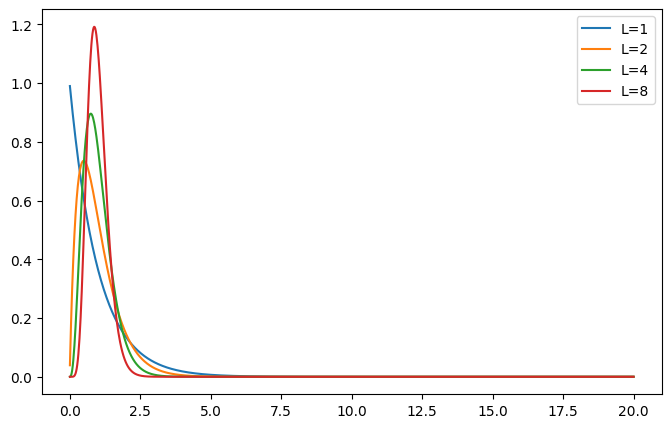

In [5]:
xx = np.linspace(1e-2, 20, 1000)

plt.figure(figsize=(8, 5))
for L in [1, 2, 4, 8]:
    plt.plot(xx, gamma_mean1_pdf(xx, L), label=f'L={L}')

plt.legend()

plt.savefig('/data/images/doq_speckle_graph1.png', dpi=300)

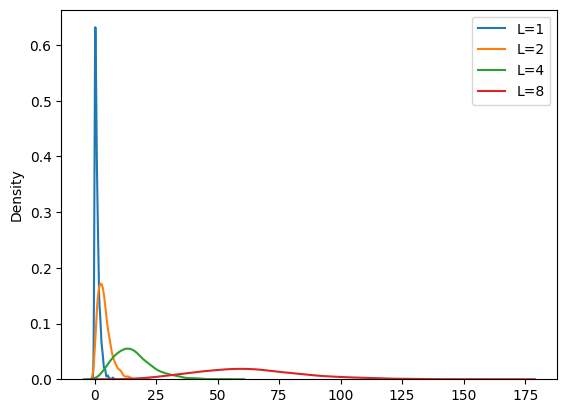

In [8]:
for L in [1,2,4,8]:
    gen = np.random.default_rng(42)
    xx = gen.gamma(shape=L, scale=L, size=1000)
    sns.kdeplot(xx, label=f'L={L}')
plt.legend()

plt.savefig('/data/images/doq_speckle_graph2.png', dpi=300)

In [9]:
def speckle_noise(shape: tuple[float, float], L: float, gen: np.random.Generator):
    """
    Compute speckle noise using Gamma distribution (see Perera paper eq. 2.)
    L is used for the shape and scale of the image and corresponds to the number of looks
    for the image.

    The resulting noise should be multipled with the image to generate a speckled image.
    """
    return gen.gamma(shape=L, scale=L, size=shape)



In [10]:
def normalize(image):
    """
    Normalizes image to the range [0, 1].
    """
    return (image - image.min()) / (image.max() - image.min())


In [11]:
image = normalize(images[4731])
gen = np.random.default_rng(42)
s1 = speckle_noise(image.shape, 1, gen)
s2 = speckle_noise(image.shape, 2, gen)
s4 = speckle_noise(image.shape, 4, gen)
s8 = speckle_noise(image.shape, 8, gen) 

In [12]:
image_s = normalize(image * s8)

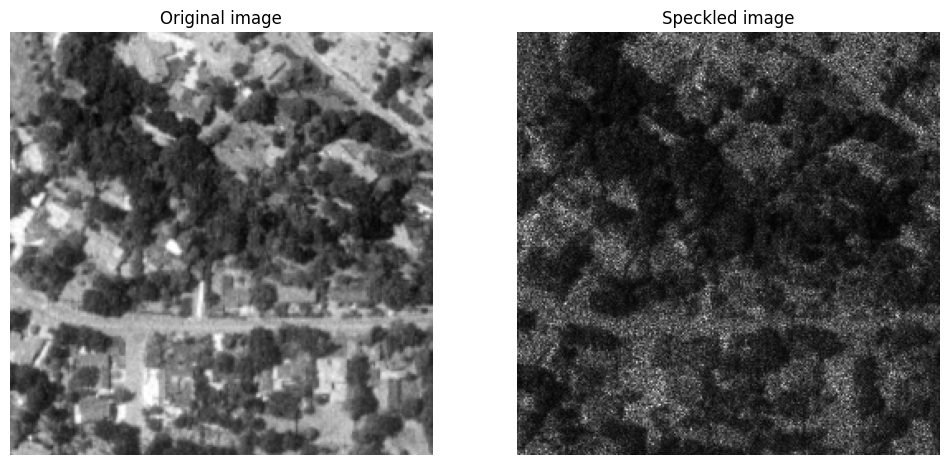

In [14]:
# plot image and image_s next to eachother
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_s, cmap='gray')
plt.title('Speckled image')
plt.axis('off')

plt.savefig('/data/images/doq_clean_speckled.png', dpi=300)